### Selected channels: 7,8,9,12



In [10]:
from EEGModels import EEGNet
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
import os
import scipy
import numpy as np
from sklearn.metrics import balanced_accuracy_score
import tensorflow as tf
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [11]:
%run "../../functions/bandpass.ipynb"
%run "../../functions/get_data.ipynb"
%run "../../functions/trimmer.ipynb"
%run "../../functions/training.ipynb"

# DATA PREPROCESSING AND FILTERING

In [12]:
folder_path = '../../data/initial_data/dance_inst_clean/'
file_list = get_file_list(folder_path)

print(file_list)

['../../data/initial_data/dance_inst_clean/P_1.mat', '../../data/initial_data/dance_inst_clean/P_10.mat', '../../data/initial_data/dance_inst_clean/P_2.mat', '../../data/initial_data/dance_inst_clean/P_3.mat', '../../data/initial_data/dance_inst_clean/P_4.mat', '../../data/initial_data/dance_inst_clean/P_5.mat', '../../data/initial_data/dance_inst_clean/P_9.mat', '../../data/initial_data/dance_inst_clean/S_1.mat', '../../data/initial_data/dance_inst_clean/S_10.mat', '../../data/initial_data/dance_inst_clean/S_2.mat', '../../data/initial_data/dance_inst_clean/S_3.mat', '../../data/initial_data/dance_inst_clean/S_4.mat', '../../data/initial_data/dance_inst_clean/S_5.mat', '../../data/initial_data/dance_inst_clean/S_9.mat']


We would now run the get_discontinuous_files() function,but on this set of data we already know that the function will not be able to find anything.

In [13]:
X, Y = get_data(file_list)

In [14]:
kick_out = [(7, [36, 50, 54]), (10, [50])]

file_dict = {0: 'P_1', 1: 'P_10', 2: 'P_2', 3: 'P_3', 4: 'P_4', 5: 'P_5', 6: 'P_9', 7: 'S_1', 8: 'S_10', 
             9: 'S_2', 10: 'S_3', 11: 'S_4', 12: 'S_5', 13: 'S_9'}

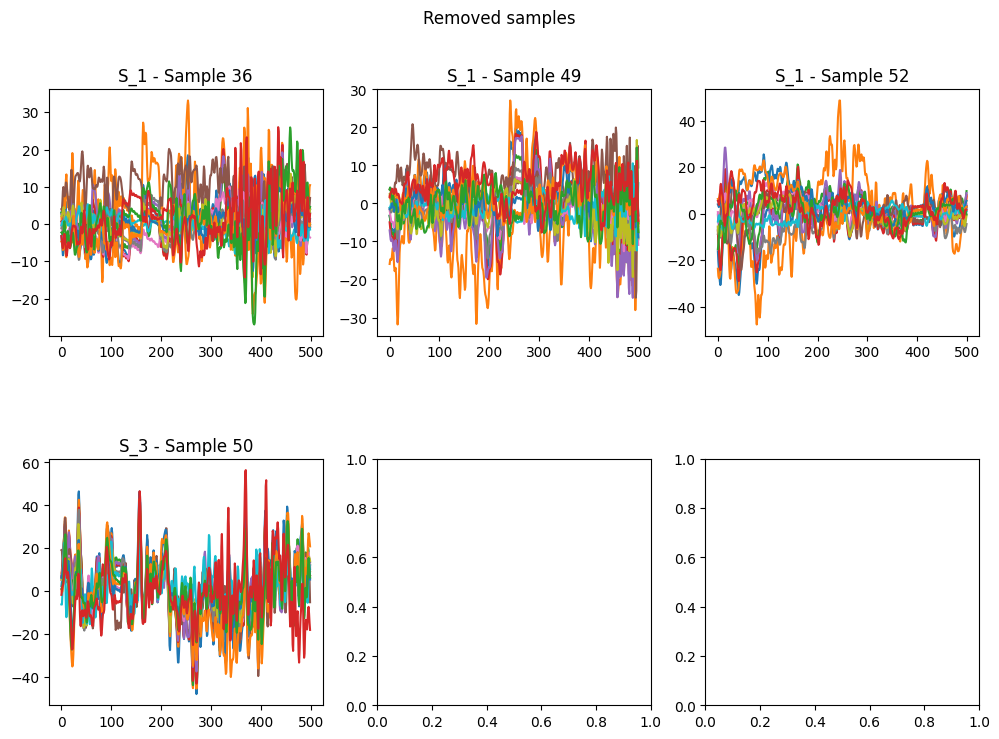

In [15]:
new_X, new_Y = trim_manually(kick_out, X, Y, file_dict, print_out=True)  

Only select the desired channels

In [16]:
desired_channels = [6, 7, 8, 11]
for i in range(len(new_X)):
    new_X[i] = new_X[i][:, desired_channels, :]

In [18]:
print_eliminations(file_list, new_X, new_Y, print_shape=True)

(48, 14, 750) -> (48, 4, 500) (48, 2)
(31, 14, 750) -> (31, 4, 500) (31, 2)
(49, 14, 750) -> (49, 4, 500) (49, 2)
(47, 14, 750) -> (47, 4, 500) (47, 2)
(66, 14, 750) -> (66, 4, 500) (66, 2)
(48, 14, 750) -> (48, 4, 500) (48, 2)
(49, 14, 750) -> (49, 4, 500) (49, 2)
(66, 14, 750) -> (63, 4, 500) (63, 2)
(36, 14, 750) -> (36, 4, 500) (36, 2)
(42, 14, 750) -> (42, 4, 500) (42, 2)
(72, 14, 750) -> (71, 4, 500) (71, 2)
(47, 14, 750) -> (47, 4, 500) (47, 2)
(46, 14, 750) -> (46, 4, 500) (46, 2)
(57, 14, 750) -> (57, 4, 500) (57, 2)
Total samples removed:  4
Total samples remaining:  700


# TRAINING ON THE FILTERED DATA

In [19]:
scroll_style = """
<style>
.output {
    overflow-y: scroll;
    max-height: 300px; /* Adjust the height as per your preference */
}
</style>
"""

In [20]:
kernels, chans, samples = 1, 4, 500

In [ ]:
display(HTML(scroll_style))
acc, p_acc, s_acc = train(kernels, samples, chans, new_X, new_Y, "../results/dance_instr_clean.txt", epochs = 50)
print_results(p_acc, s_acc, acc, "../results/dance_instr_clean.txt")